Помимо  нейронных сетей и ансамблевых алгоритмо, многие задачи можно также решить и линейными алгоритмами. 
К ним относятся:
    - Линейная регрессия,
    - Метод наименьших квадратов,
    - Градиентный спуск,
    - Логистическая регрессия, и др.
Об перечисленных алгоритмамах пойдет речь в этой заметке.

Для начала подругим данные и выполним все необходимые манимупуляции.

Простая линейная регрессия

Простая  линейная регрессия  аппроксимируется всем известной со школы функцией прямой линии (у = кх + в) с той лишь разницей, что теперь нужно добавить случайную ошибку эпсилион (у = кх + в + е), где:
у — зависимая переменная 
х - известная константа (значение объясняющей переменной, измерянной в i-ом значении)
к - свободный член 
х - угловой коэффициент
е — случайная ошибка


Задача регрессии возникает, когда требуется предсказать цену, температура, пульс, время, давление или другое численный показатель. Это пример контролируемого (supervised) машинного обучения, когда на основе истории предыдущих данных мы получаем предсказание. В этой статье обсудим, как можно спрогнозировать будущее, решая задачу линейной регрессии на Python.

In [1]:
# Подгрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Загрузим данные
data = pd.read_csv('AB_NYC_2019.csv')
data = data[data['neighbourhood_group'] == 'Brooklyn']

In [3]:
#  Функции для поиска коэффициенто x и y
def calculate_slope(x, y):
    mx = x - x.mean()
    my = y - y.mean()
    return sum(mx * my) / sum(mx**2)
def get_params(x, y):
    a = calculate_slope(x, y)
    b = y.mean() - a * x.mean()
    return a, b

В нашем случае выберем в качестве независимой переменной 
x – количество отзывов number_of_reviews, 
y - переменная , которую требуется предсказать, будет цена price. 


In [4]:
# Отберем параметры с положительной ценой
d = data[data.price > 0]
x = d.number_of_reviews

# пролагорифмируем данные, чтобы избежать излешней волатильности
y = np.log(d.price)
a, b = get_params(x, y)

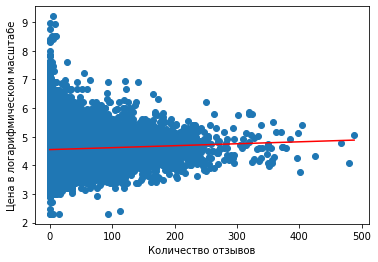

In [5]:
# Построим графики

# Функция подбора координат для посторения графика
def lin_reg(a, b):
#     n1 = x.iloc[0]
#     n2 = x.iloc[len(x) - 1] 
    
    n1 = x.min()
    n2 = x.max()
    
    y1 = a * n1 + b
    y2 = a * n2 + b  
    point_1 = [n1, n2]
    point_2 = [y1, y2]
    
    return point_1, point_2

# Вызовем функцию для нахождения координат нахождения графика
# mmm[0] - ось абсцицц
# mmm[1] - ось ординат
mmm = lin_reg(a, b)

plt.xlabel('Количество отзывов')
plt.ylabel('Цена в логарифмическом масштабе')
plt.scatter(x, y)
plt.plot( mmm[0], mmm[1], color='red')

Для того, чтобы получить линейную регрессию, можно воспользоваться готовыми библиотеками, например, отлично подойдет библиотека Statsmodel, о которой мы уже говорили здесь. Она позволит получить линейную регрессию очень быстро:

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

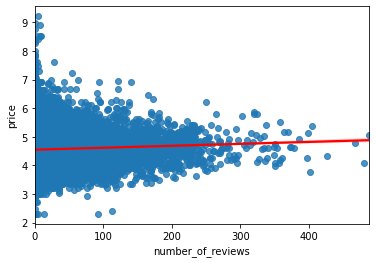

In [6]:
# Подгрузим библиотеку
import seaborn as sns

# Функция regplot, которая строит график линейной регрессии
sns.regplot(x, y, 
            line_kws={"color": "red"}) # Окрашивание разделющей линии в красный

In [7]:
# Подгрузим библиотеку
import statsmodels.formula.api as smf

# Зададим параметры модели
model = smf.ols('price ~ number_of_reviews', data=data)

# Обучим модель
res = model.fit()

# Метод summary выдает резюме после вычислений
# линейной регрессии по методу наименьших квадратов
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.010
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.156
Time:                        11:49:43   Log-Likelihood:            -1.3368e+05
No. Observations:               20104   AIC:                         2.674e+05
Df Residuals:                   20102   BIC:                         2.674e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           125.4031      1.501     83.520      0.000     122.460     128.346
number_of_reviews    -0.0421      0.030     -1.418      0.156      -0.100       0.016
==============================================================================
Omnibus:                    47264.188   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        648346949.604
Skew:                          23.457   Prob(JB):                         0.00
Kurtosis:                     881.516   Cond. No.                         57.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

intercept – это b,
number_of reviews, – это a

Если необходимо быстро взглянуть на линию линейной регрессии, то можно воспользоваться библиотекой seaborn.

Множественная линейная регрессия.

В действительности ML-модели редко обучаются только на одном признаке, что подтверждают построенные графики. Поэтому уравнение для линейной регрессии можно обобщить до n переменных (признаков):

  \[ y = ax_1 + ax_2 \dots + \dots + ax_n \]

где задача сводится к нахождению коэффициентов. Не вдаваясь в подробности их нахождения, отметим, что Python-библиотека Scikit-learn предоставляет для этого уже готовый интерфейс.

Рассмотрим пример в Python. Выберем в качестве независимых переменных признаки: number_of_reviews, reviews_per_month, calculated_host_listings_count. Атрибут reviews_per_month имеет Nan-значения, поэтому в дальнейшем заполним их нулями.

In [8]:
# Выберем положительные данные
d = data[data.price > 0]

# Исключим из обучающей выборки данные которые имеют нулевое значение
d['reviews_per_month'].fillna(0, inplace=True)
x = d.loc[:, ('reviews_per_month',
              'calculated_host_listings_count',
              'number_of_reviews')]

# Выберем из общей выборки целевое значение
y = d.loc[:, 'price']

c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Здесь используется метод loc, который, согласно документации, быстрее и производительнее явного вызова столбцов. Нам также требуется разбить полученные данные на тренировочную и тестовую выборки, чтобы на одних данных обучить модель, а на других – проверить ее корректность.

In [9]:
# Разделим выборку на тренировочную и тестовую:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [10]:
# Подгрузим из библиотке Sklearn модуль LinearRegression
from sklearn.linear_model import LinearRegression

# Обучим модель
model = LinearRegression().fit(x_train, y_train)

In [11]:
# Предскажем по полученным параметрам данные из тестовой выборки
y_pred = model.predict(x_test)

МЕТРИКИ КАЧЕСТВА ДЛЯ ОЦЕНКИ РАБОТОСПОСОБНОСТИ МОДЕЛИ
Чтобы оценить работоспособность модели, применяют специальные метрики. Для задачи регрессии применяют среднеквадратическую (MSE) и абсолютную ошибки (MAE). 
Среднеквадратическая ошибка находится как:

  \[ MSE = \frac{1}{n}\sum(y-y_{pred})^2 \]

Абсолютная опускает возведение в квадрат:

  \[ MAE = \frac{1}{n}\sum|y-y_{pred}| \]

Перед оценкой стоит экспонировать тестовые и пересказанные значения, так как использовать MAE и MSE для логарифмов будет нецелесообразно, поскольку трудно будет оценить полученные результаты. Поэтому проделаем следующее:

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Подсчитаем mse и mae
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse: %.3f, mae: %.3f' % (mse, mae))

mse: 32378.526, mae: 69.903



Метод наименьших квадратов

Метод наименьших квадратов (МНК) — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Он может использоваться для «решения» переопределенных систем уравнений (когда количество уравнений превышает количество неизвестных), для поиска решения в случае обычных (не переопределенных) нелинейных систем уравнений, для аппроксимации точечных значений некоторой функции. МНК является одним из базовых методов регрессионного анализа для оценки неизвестных параметров регрессионных моделей по выборочным данным.


In [13]:
# Подгрузим библиотеки
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np



# Исходные данные
T_values = np.array([222, 284, 308.5, 333, 358, 411, 477, 518, 880, 1080, 1259])
C_values = np.array([0.1282, 0.2308, 0.2650, 0.3120 , 0.3547, 0.4530, 0.5556, 0.6154, 0.8932, 0.9103, 0.9316])

x_samp = T_values
y_samp = C_values  

In [14]:
# Создадим  общую функцию подбора коэфициентов для экспоненциальной функции:
def func(x, A, c, d):
    return A*np.exp(c*x) + d

Возможные варианты:
    - меньше A, дает меньшую амплитуду
    - отрицательный A, переворот кривой по горизонтальной плоскости
    - меньший c, контролирует форму, выравнивая «колено» кривой
    - отрицательный c, переворот кривой по вертикальной плоскости
    - d устанавливает Y-перехват
    

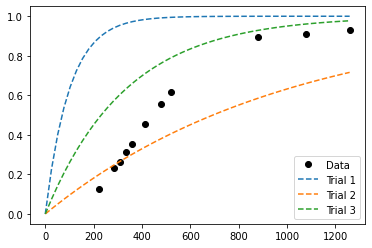

In [15]:

# Посмотрим на данные и попытаемся эмулировать кривую, регулируя эти параметры.
# Для демонстрации проиллюстрируем несколько испытаний:
plt.plot(x_samp, y_samp, "ko", label="Data")

# 50 равномерно расположенных цифр от 0 до макс.
x_lin = np.linspace(0, x_samp.max(), 50)                   

# Испытания
A, c, d = -1, -1e-2, 1
y_trial1 = func(x_lin,  A,     c, d)
y_trial2 = func(x_lin, -1, -1e-3, 1)
y_trial3 = func(x_lin, -1, -3e-3, 1)

# Отобразим
plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.legend()

Estimated Parameters [-1.66301087 -0.0026884   1.00995394]


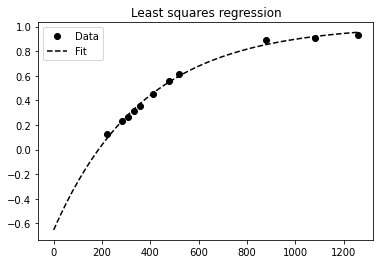

In [16]:
# Проведем оценку:
p0 = [-1, -3e-3, 1] 
# ищем параметры
w, _ = opt.curve_fit(func, x_samp, y_samp, p0=p0)     
print("Estimated Parameters", w)  

# Модель
y_model = func(x_lin, *w)


# Отобразим данные
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")




curve_fit - является одной из многих функций оптимизации, предлагаемых Scipy. При заданном начальном значении результирующие оценочные параметры итеративно уточняются, так что результирующая кривая минимизирует остаточную ошибку или разницу между подогнанной линией и данными выборки. Лучшее предположение уменьшает количество итераций и ускоряет результат. С этими оцененными параметрами для подобранной кривой теперь можно рассчитать конкретные коэффициенты для конкретного уравнения (последнее упражнение осталось до ОП).


Градиентный спуск




Градиентный спуск — метод нахождения минимального значения функции потерь. Минимизация любой функции означает поиск самой глубокой впадины в этой функции. Имейте в виду, что функция используется, чтобы контролировать ошибку в прогнозах модели машинного обучения. Поиск минимума означает получение наименьшей возможной ошибки или повышение точности модели. Мы увеличиваем точность, перебирая набор учебных данных при настройке параметров нашей модели (весов и смещений).
Итак, градиентный спуск нужен для минимизации функции потерь.
Метод градиентного спуска с некоторой модификацией широко используется для обучения персептрона и глубоких нейронных сетей, и известен как метод обратного распространения ошибки.




Суть алгоритма – процесс получения наименьшего значения ошибки. Аналогично это можно рассматривать как спуск во впадину в попытке найти золото на дне ущелья (самое низкое значение ошибки). В дальнейшем, чтобы найти самую низкую ошибку (глубочайшую впадину) в функции потерь (по отношению к одному весу), нужно настроить параметры модели.

Когда мы перебираем все учебные данные, мы продолжаем добавлять значения  dJ/dw для каждого веса. Так как потери зависят от примера обучения, dJ/dw также продолжает меняться. Затем делим собранные значения на количество примеров обучения для получения среднего. Потом мы используем это среднее значение (каждого веса) для настройки каждого веса.

Функция потерь предназначена для отслеживания ошибки с каждым примером обучениям, в то время как производная функции относительного одного веса – это то, куда нужно сместить вес, чтобы минимизировать ее для этого примера обучения. Вы можете создавать модели даже без применения функции потерь. Но вам придется использовать производную относительно каждого веса (dJ/dw).


Кроме функции потерь градиентный спуск также требует градиент, который является dJ/dw (производная функции потерь относительно одного веса, выполненная для всех весов). dJ/dw зависит от вашего выбора функции потерь. Наиболее распространена функция потерь среднеквадратичной ошибки.

Производная этой функции относительно любого веса (эта формула показывает вычисление градиента для линейной регрессии):

Проблема у большинства моделей использующих градиентный спуск возникает с коэффициентом скорости обучения. Давайте взглянем на обновленное выражение для каждого веса (j лежит в диапазоне от 0 до количества весов, а Theta-j это j-й вес в векторе весов, k лежит в диапазоне от 0 до количества смещений, где B-k — это k-е смещение в векторе смещений). Здесь alpha – коэффициент скорости обучения. Из этого можно сказать, что мы вычисляем dJ/dTheta-j ( градиент веса Theta-j), и затем шаг размера alpha в этом направлении. Следовательно, мы спускаемся по градиенту. Чтобы обновить смещение, замените Theta-j на B-k.


Если этот размера шага alpha слишком велик, мы преодолеем минимум: то есть промахнемся мимо минимума. Если alpha слишком мала, мы используем слишком много итераций, чтобы добраться до минимума. Итак, alpha должна быть подходящей.



In [17]:
# для нахождения производной
from scipy.misc import derivative

# для работы графиков
%matplotlib inline
from matplotlib import pylab as plt

In [18]:
# определяем функцию
def f(x):
    return (x-5)**2

# проверяем нахождение f'(x)
derivative(f, 0)

-10.0

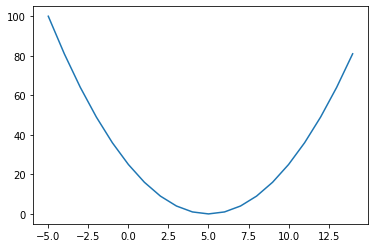

In [19]:
# рисуем график функции
x = range(-5,15)
y = [f(xn) for xn in x]
plt.plot(x, y)
plt.show()

In [20]:
# подготовка к Град. спуску

# начальн. значение
xn = 0 
yn = f(xn)

# заводим словарь, где будем хранить все найденные значения функции
Y = {xn: yn}

# шаг ГС (произвольный подибраем)
step = 0.1

# по формуле градиентного спуска получаем все значения x y
for _ in range(25):
    xn = xn - step*derivative(f, xn)
    yn = f(xn)
    Y[xn] = yn

print(Y)

{0: 25, 1.0: 16.0, 1.8: 10.240000000000002, 2.4400000000000004: 6.553599999999998, 2.9520000000000004: 4.194303999999998, 3.3616: 2.6843545599999996, 3.68928: 1.7179869183999996, 3.9514240000000003: 1.0995116277759995, 4.1611392: 0.7036874417766399, 4.32891136: 0.4503599627370493, 4.4631290880000005: 0.2882303761517112, 4.570503270400001: 0.184467440737095, 4.65640261632: 0.11805916207174093, 4.725122093056: 0.07555786372591429, 4.7800976744448: 0.04835703278458515, 4.82407813955584: 0.030948500982134555, 4.859262511644672: 0.019807040628566166, 4.8874100093157375: 0.012676506002282305, 4.90992800745259: 0.008112963841460612, 4.927942405962073: 0.005192296858534741, 4.942353924769658: 0.0033230699894622544, 4.953883139815726: 0.0021267647932558427, 4.9631065118525814: 0.0013611294676837131, 4.9704852094820655: 0.0008711228593175555, 4.976388167585652: 0.0005575186299632523, 4.981110534068522: 0.000356811923176468}


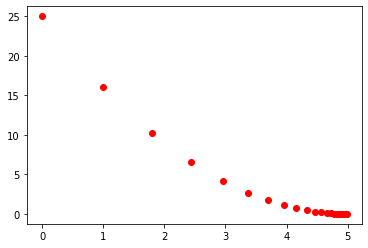

In [21]:
# наносим найденные точки на график
plt.plot(list(Y.keys()), list(Y.values()), 'ro')
plt.show()

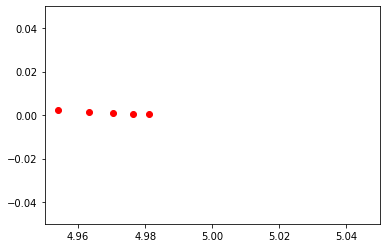

In [22]:
# масштабируем
plt.plot(list(Y.keys()), list(Y.values()), 'ro')
plt.axis([4.95, 5.05, -0.05, 0.05])
plt.show()

In [23]:
# словарь значений, где key = х (просто инвертируем Y)
X = {}
for i in range(len(Y)):
    X[list(Y.values())[i]] = list(Y.keys())[i]

# выводим пару искомых минимальных X и Y (близких к минимумам)
print ('мин. Х =', min(X.items())[1])
print ('мин. Y =', min(X.items())[0])

мин. Х = 4.981110534068522
мин. Y = 0.000356811923176468
